# mrbles pipeline example

## Load necessary modules

In [1]:
import os
import gc
import importlib
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import mrbles

# For fancy interactive Plotly graphs
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tools
from plotly.tools import FigureFactory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # For plotly offline mode
# Set plotly to notebook mode
init_notebook_mode(connected=True)
py.sign_in('bjornharink_stanford', 'VqISgcHFwPkY0z50PG47')

Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford


In [2]:
# importlib.reload(mrbles)
# importlib.reload(mrbles.data)
# importlib.reload(mrbles.core)
# importlib.reload(mrbles.pipeline)
# importlib.reload(mrbles)

## Load image set

The dictionary keys of image folders and image pattersn must match.
The instatiatiation of the object will search for the files. An error is thrown if no images are found.

In [3]:
# image_folder = r"C:\DATA\Huy"
# image_folders = {"50 nM" : r"C:\DATA\Huy", 
#                  "100 nM" : r"C:\DATA\Huy",
#                  "250 nM" : "C:\DATA\Huy",
#                  "500 nM" : r"C:\DATA\Huy",
#                  "1000 nM" : r"C:\DATA\Huy"
# }
# image_patterns = {"50 nM" : r"20170726_HQN_CN_PxI2_1Step_50nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
#                   "100 nM" : r"20170726_HQN_CN_PxI2_1Step_100nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "250 nM" : "20170726_HQN_CN_PxI2_1Step_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "500 nM" : r"20170726_HQN_CN_PxI2_1Step_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "1000 nM" : r"20170726_HQN_CN_PxI2_1Step_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
# }
# mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
# mrbles_images.crop_x = slice(90, 990)
# mrbles_images.crop_y = slice(90, 990)

In [4]:
# image_folders = {"63 nM" : r"C:\DATA\Huy\20180111 CN", 
#                  "125 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "250 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "500 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "1000 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "2000 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "Biotin" : r"C:\DATA\Huy\20180111 CN"
#                  #"NIR" : r"C:\DATA\Huy\20180111 CN"
# }
# image_patterns = {"63 nM" : r"20180111_CN_Final_Normal_p49_63nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
#                   "125 nM" : r"20180111_CN_Final_Normal_p49_125nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "250 nM" : "20180111_CN_Final_Normal_p49_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "500 nM" : r"20180111_CN_Final_Normal_p49_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "1000 nM" : r"20180111_CN_Final_Normal_p49_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "2000 nM" : r"20180111_CN_Final_Normal_p49_2uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "Biotin" : r"20180111_CN_Final_Normal_biotinb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
#                   #"NIR" : r"20180111_CN_Final_Normal_nir_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
# }
# mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
# mrbles_images.crop_x = slice(90, 990)
# mrbles_images.crop_y = slice(90, 990)

In [5]:
# image_folders = {"32 nM" : r"C:\DATA\Huy\20180112 CN",
#                  "63 nM" : r"C:\DATA\Huy\20180112 CN", 
#                  "125 nM" : r"C:\DATA\Huy\20180112 CN",
#                  "250 nM" : r"C:\DATA\Huy\20180112 CN",
#                  "500 nM" : r"C:\DATA\Huy\20180112 CN",
#                  "1000 nM" : r"C:\DATA\Huy\20180112 CN",
#                  "2000 nM" : r"C:\DATA\Huy\20180112 CN",
#                  "Biotin" : r"C:\DATA\Huy\20180111 CN"
#                  #"NIR" : r"C:\DATA\Huy\20180111 CN"
# }
# image_patterns = {"32 nM" : r"20180111_CN_Final_Super_32nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "63 nM" : r"20180111_CN_Final_Super_63nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
#                   "125 nM" : r"20180111_CN_Final_Super_125nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "250 nM" : "20180111_CN_Final_Super_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "500 nM" : r"20180111_CN_Final_Super_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "1000 nM" : r"20180111_CN_Final_Super_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "2000 nM" : r"20180111_CN_Final_Super_2uMd_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "Biotin" : r"20180111_CN_Final_Normal_biotinb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
#                   #"NIR" : r"20180111_CN_Final_Normal_nir_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
# }
# mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
# mrbles_images.crop_x = slice(90, 990)
# mrbles_images.crop_y = slice(90, 990)

In [6]:
# image_folders = {"NIR_calib" : r"C:\DATA\Huy\20180111 CN",
#                  "NIR_super" : r"C:\DATA\Huy\20180112 CN",
#                  "aHis" : r"C:\DATA\Huy\20180112 CN"
# }

# image_patterns = {"NIR_calib" : r"20180111_CN_Final_Normal_nir_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "NIR_super" : r"20180111_CN_Final_Super_nir_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "aHis"      : r"20180201_CN_super_aHis_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
                  
# }
# mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
# mrbles_images.crop_x = slice(260, 776)
# mrbles_images.crop_y = slice(206, 776)
# mrbles_images.load()
# mrbles_images.rename_channel('Cy5-E', 'Cy5')

In [2]:
image_folders = {"63 nM" : r"C:\DATA\Huy\20180207 CN", 
                 "125 nM" : r"C:\DATA\Huy\20180207 CN",
                 "250 nM" : r"C:\DATA\Huy\20180207 CN",
                 "500 nM" : r"C:\DATA\Huy\20180207 CN",
                 "1000 nM" : r"C:\DATA\Huy\20180207 CN",
                 "2000 nM" : r"C:\DATA\Huy\20180207 CN",
                 "Biotin" : r"C:\DATA\Huy\20180111 CN"
}
image_patterns = {"63 nM" : r"20180207_CN_selected_63nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
                  "125 nM" : r"20180207_CN_selected_125nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "250 nM" : "20180207_CN_selected_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "500 nM" : r"20180207_CN_selected_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "1000 nM" : r"20180207_CN_selected_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "2000 nM" : r"20180207_CN_selected_2uMb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "Biotin" : r"20180111_CN_Final_Normal_biotinb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
}
mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)

In [3]:
mrbles_images.load()

In [4]:
mrbles_images.rename_channel('Cy5-E', 'Cy5')
mrbles_images.rename_channel('Cy5-E 10%', 'Cy5')

In [5]:
mrbles_images.crop_x = slice(90, 940)
mrbles_images.crop_y = slice(90, 940)

In [77]:
mrbles_images

{'63 nM': <xarray.DataArray (f: 35, c: 11, y: 850, x: 850)>
array([[[[405, ..., 604],
         ...,
         [469, ..., 660]],

        ...,

        [[121, ..., 111],
         ...,
         [109, ..., 108]]],


       ...,


       [[[364, ..., 514],
         ...,
         [435, ..., 602]],

        ...,

        [[121, ..., 105],
         ...,
         [106, ..., 111]]]], dtype=uint16)
Coordinates:
  * c        (c) <U11 'Cy5' 'Brightfield' 'l-435' 'l-474' 'l-536' 'l-546' ...
Dimensions without coordinates: f, y, x, '125 nM': <xarray.DataArray (f: 31, c: 11, y: 850, x: 850)>
array([[[[542, ..., 667],
         ...,
         [508, ..., 752]],

        ...,

        [[125, ..., 109],
         ...,
         [102, ..., 128]]],


       ...,


       [[[464, ..., 592],
         ...,
         [536, ..., 890]],

        ...,

        [[123, ..., 106],
         ...,
         [110, ..., 104]]]], dtype=uint16)
Coordinates:
  * c        (c) <U11 'Cy5' 'Brightfield' 'l-435' 'l-474' 'l-536' 'l-546'

In [7]:
# plt.figure()
# plt.imshow(mrbles_images['63 nM', 0, 'Brightfield'])

In [13]:
# biotin_folders = {"Biotin" : r"C:\DATA\Huy\20180111 CN"
# }

# biotin_patterns = {"Biotin" : r"20180111_CN_Final_Normal_biotinb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
                  
# }
# mrbles_biotin = mrbles.Images(folders=biotin_folders, file_patterns=biotin_patterns)
# #mrbles_biotin.crop_x = slice(90, 990)
# #mrbles_biotin.crop_y = slice(90, 990)
# mrbles_biotin.load()
# mrbles_images.rename_channel('Cy5-E 10%', 'Cy5')

In [14]:
# mrbles_biotin

If no error was thrown the images can be loaded into memory.

In [15]:
#mrbles_images.load()

By calling the object the Xarray content is displayed.

The internal Xarray DataArray can be sliced using Xarray syntax (similar to Pandas).
```python
mrbles_images['set name', file number, 'channel name', y-slice, x-slice]
```

In [16]:
# plt.figure(dpi=150)
# plt.imshow(mrbles_images['NIR_calib', 2, 'Brightfield']);

## Find MRBLEs in images

Instatiate a MBRLEs finding object, giving initial bead_size (pixels), which must be set. More fine-tune settings can be set by calling object.settings.area_max etc. Otherwise, default settings are used.

In [9]:
find_mrbles = mrbles.Find(bead_size=14, border_clear=True, circle_size=350)
find_mrbles.settings.eccen_max = 0.65
find_mrbles.settings.parallelize = False

In [10]:
find_mrbles.find(mrbles_images[:, : , 'Brightfield'])

Mean bead radius: 14.35
CV bead radius: 100.00
Number of beads in set 63 nM: 919
Number of beads in set 125 nM: 841
Number of beads in set 250 nM: 863
Number of beads in set 500 nM: 920
Number of beads in set 1000 nM: 969
Number of beads in set 2000 nM: 478
Number of beads in set Biotin: 3204
Total number of beads: 8194


In [19]:
# find_biotin = mrbles.Find(bead_size=14, border_clear=True, circle_size=350)
# find_biotin.settings.eccen_max = 0.65
# find_biotin.settings.parallelize = True
# find_biotin.find(mrbles_biotin[:, : , 'Brightfield'])

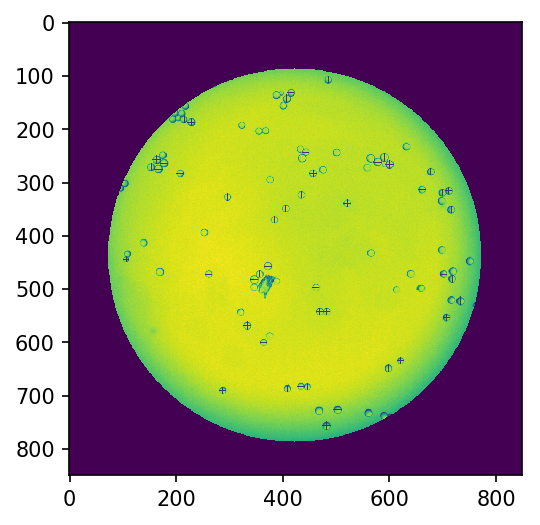

In [11]:
plt.figure(dpi=150)
plt.imshow(find_mrbles['63 nM', 12, 'mask_check'])

In [21]:
# plt.figure(dpi=150)
# find_mrbles.settings.show_image_overlay(find_mrbles['NIR_calib', 10, 'mask_check'], mrbles_images['NIR_calib', 10, 'Cy5'])

## Create Reference spectra

In [12]:
# Channel settings
DECODE_CHANNELS = slice('l-435','l-780')  # Channel range for decoding
OBJECT_CHANNEL = 'Brightfield'  # Channel for bead finding

# Reference files
REF_FOLDER = {
    "Dy": r"C:\DATA\20170406 - Reference files - KARA",
    "Sm": r"C:\DATA\20170406 - Reference files - KARA",
    "Tm": r"C:\DATA\20170406 - Reference files - KARA",
    "Eu": r"C:\DATA\20170406 - Reference files - KARA",
    "bkg": r"C:\DATA\Huy\20180111 CN\20180111_CN_Final_Normal_biotinb_5"
}
REF_FILES = {"Dy" : "Dy_Solos_3_MMStack_Pos0.ome.tif",
             "Sm" : "Sm_solos_5_MMStack_Pos0.ome.tif",
             "Tm" : "Tm_solos_3_MMStack_Pos0.ome.tif",
             "Eu" : "Eu_solos_6_MMStack_Pos0.ome.tif",
             "bkg" : "20180111_CN_Final_Normal_biotinb_5_MMStack_Pos0.ome.tif"
}

In [13]:
spec_object = mrbles.References(REF_FOLDER, REF_FILES, OBJECT_CHANNEL, DECODE_CHANNELS, bead_size=18)
spec_object.crop_x = slice(262, 762)
spec_object.crop_y = slice(262, 762)
spec_object.bkg_roi = [slice(390, 738), slice(377, 733)]

In [14]:
spec_object.load()

Mean bead radius: 15.65
CV bead radius: 100.00
Number of beads in set Dy: 270
Number of beads in set Sm: 506
Number of beads in set Tm: 308
Number of beads in set Eu: 203
Total number of beads: 1287


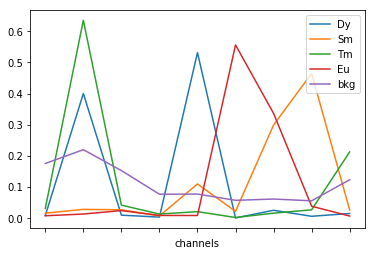

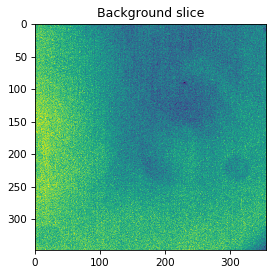

In [15]:
spec_object.plot()

## Spectral unmixing and get ratios

In [16]:
ratio_images = mrbles.Ratio(spec_object)

In [17]:
ratio_images.get(mrbles_images[:, :, DECODE_CHANNELS], 'Eu', combine_data=mrbles_images[:, :, ['Cy5']])

c:\python36\lib\site-packages\xarray\core\dtypes.py:23: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

c:\python36\lib\site-packages\xarray\core\dtypes.py:25: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.

c:\python36\lib\site-packages\xarray\core\dtypes.py:29: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



In [18]:
ratio_images

{'63 nM': <xarray.DataArray (f: 35, c: 9, y: 850, x: 850)>
array([[[[405, ..., 604],
         ...,
         [469, ..., 660]],

        ...,

        [[897.6670812376525, ..., 948.4683551886526],
         ...,
         [882.8341850450685, ..., 982.8907913437683]]],


       ...,


       [[[364, ..., 514],
         ...,
         [435, ..., 602]],

        ...,

        [[837.5439283141959, ..., 874.3679543813078],
         ...,
         [846.8936239050703, ..., 931.5986791212279]]]], dtype=object)
Coordinates:
  * c        (c) object 'Cy5' 'Dy' 'Dy_ratio' 'Eu' 'Sm' 'Sm_ratio' 'Tm' ...
Dimensions without coordinates: f, y, x, '125 nM': <xarray.DataArray (f: 31, c: 9, y: 850, x: 850)>
array([[[[542, ..., 667],
         ...,
         [508, ..., 752]],

        ...,

        [[922.5760347415095, ..., 1683.8859076914937],
         ...,
         [875.1996032056106, ..., 2585.023540535762]]],


       ...,


       [[[464, ..., 592],
         ...,
         [536, ..., 890]],

        ...,

    

In [ ]:
# ratio_biotin = mrbles.Ratio(spec_object)
# ratio_biotin.get(mrbles_biotin[:, :, DECODE_CHANNELS], 'Eu', combine_data=mrbles_biotin[:, :, ['Cy5-E 10%']])

## Extract data from each MRBLE

In [19]:
extract_data = mrbles.Extract()

In [20]:
extract_data.get(ratio_images[:, :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5']], 
                 find_mrbles[:, :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']])

In [21]:
extract_data.filter(bkg_factor=2.0, ref_factor=2.0, bkg='bkg.mask_full', ref='Eu.mask_inside')

Pre-filter: 8197
Post-filter: 7723
Filtered: 474 (5.8%)


In [ ]:
# extract_biotin = mrbles.Extract()
# extract_biotin.get(ratio_biotin[:, :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5-E 10%']], 
#                    find_biotin[:, :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']])
# extract_biotin.filter(bkg_factor=2.0, ref_factor=2.0, bkg='bkg.mask_full', ref='Eu.mask_inside')

## Decode

In [92]:
# Target file location
# TARGET_FOLDER = r"C:\DATA\CodeSets"
# TARGET_FILE = os.path.join(TARGET_FOLDER, "20160226_DySmTm_48Codes.csv")
# TARGET_FILE = os.path.join(TARGET_FOLDER, "20160226_DySmTm_96Codes.csv")
#target_load = np.genfromtxt(TARGET_FILE, delimiter=',')
# target = target_load[:, 1:4]  # Target set to Dy, Sm, Tm (no CeTb) Order: [CeTb, Dy, Sm, Tm]

seq_file = pd.read_excel(r'C:\DATA\Huy\20180105_SEQ_CN_Final-Match-List.xlsx')
#seq_file = seq_file[(seq_file.code != 18) & (seq_file.code != 27) & (seq_file.code != 47)]
seq_file.loc[(seq_file.code==12), ('Dy', 'Sm', 'Tm')] = [0, 0.41682, 0.02844]
seq_file.loc[(seq_file.code==13), ('Dy', 'Sm', 'Tm')] = [0, 0.47785, 0.04081]
#target = seq_file.loc[:, ['Dy', 'Sm', 'Tm']].values
target = seq_file.loc[(seq_file.set=='match'), ['Dy', 'Sm', 'Tm']].values
target_biotin = seq_file.loc[:, ['Dy', 'Sm', 'Tm']].values
sequences = seq_file.loc[(seq_file.set=='match')].reset_index(drop=True)
#sequences = seq_file.reset_index(drop=True)
sequences_biotin = seq_file.reset_index(drop=True)

In [93]:
sequences

,code,sequence,repeat,set,info,Dy,Sm,Tm
0,1,AGIVPIHVTHAPGEE,NaN,match,Scramble,0.00000,0.00000,0.00000
1,2,HPVIVITGPHEE,NaN,match,PVIVIT-WT,0.00000,0.00000,0.08449
2,3,HPRIVITGPHEE,NaN,match,PVIVIT-Core,0.00000,0.00000,0.28960
3,4,HPLIVITGPHEE,NaN,match,PVIVIT-Core,0.00000,0.00000,0.78752
4,5,HPVIVIEGPHEE,NaN,match,PVIVIT-Core,0.00000,0.10822,0.00000
5,6,HPVIVLTGPHEE,NaN,match,PVIVIT-Core,0.00000,0.10822,0.08449
6,7,IPVIVITGPHEE,NaN,match,PVIVIT-Flank,0.00000,0.10822,0.28960
7,8,HPVIVITGLHEE,NaN,match,PVIVIT-Flank,0.00000,0.10822,0.78752
8,9,HPVIVITMPHEE,NaN,match,PVIVIT-Flank,0.00000,0.25050,0.00000
9,10,HPKIVITGPHEE,NaN,match,PKIVIT-Core,0.00000,0.25050,0.08449


In [41]:
biotin_set = extract_data.data.loc[('Biotin')]

In [42]:
biotin_set

Cy5  Cy5.mask_bkg  Cy5.mask_full  Cy5.mask_inside  Cy5.mask_lbl  \
0  0    NaN         405.0        13515.5          13060.0           3.0   
   1    NaN         426.5        14138.5          13222.0           4.0   
   2    NaN         428.0        15621.5          15645.0           5.0   
   3    NaN         449.0        14640.0          13695.5           6.0   
   4    NaN         467.0        15137.5          15306.0           7.0   
   5    NaN         496.5        12286.0          11492.0           8.0   
   6    NaN         469.5        13055.0          12382.5           9.0   
   7    NaN         452.5        13695.0          13099.5          10.0   
   8    NaN         469.0        14515.0          13898.5          11.0   
   10   NaN         501.5        13949.0          13178.0          13.0   
   11   NaN         476.0        16933.5          16653.0          14.0   
   12   NaN         464.0        18694.0          19651.0          15.0   
   14   NaN         461.0        10711.0           9363.0          17.0   
   15   NaN         479.0        14546.0          13555.0          18.0   
   16   NaN         585.0        13560.5          12755.5          20.0   
   17   NaN         441.0        11761.0          11355.0          21.0   
   18   NaN         446.0        14317.0          12462.0          22.0   
   19   NaN         422.0        10658.0          10172.0          23.0   
   20   NaN         422.0        12050.0          10577.0          24.0   
   21   NaN         401.0        12349.0          11665.0          25.0   
   22   NaN         519.0        13598.0          12188.0          26.0   
   23   NaN         486.0        18961.5          15805.0          27.0   
   24   NaN         410.0        13846.0          13612.0          28.0   
   25   NaN         440.0        19393.0          19013.0          29.0   
   26   NaN         378.0        11109.0           9799.0          30.0   
   27   NaN         404.5        11226.0          10658.5          31.0   
   29   NaN         397.0        15921.0          14495.0          33.0   
   30   NaN         376.0        16157.0          14005.5          34.0   
   31   NaN         390.0        18510.0          16927.5          35.0   
   33   NaN         385.0        23922.5          24174.0          37.0   
...     ...           ...            ...              ...           ...   
27 234  NaN         466.0        14330.0          12515.0         255.0   
28 0    NaN         418.0        12434.5          11331.0           3.0   
   1    NaN         461.0        15217.0          15399.0           4.0   
   2    NaN         584.0        10839.0           9971.5           6.0   
   3    NaN         457.0        13609.0          13060.5           7.0   
   4    NaN         369.0         9975.0           9620.0           8.0   
   5    NaN         541.5        13464.0          12241.0           9.0   
   6    NaN         464.0        13064.0          12395.5          11.0   
   7    NaN        1419.0        11901.0          10054.0          12.0   
   8    NaN         595.5        11570.0          10681.0          13.0   
   9    NaN         508.5         9495.5           8745.0          14.0   
   10   NaN         374.0         9383.5           9095.0          15.0   
   11   NaN        7682.5         9916.0           9670.0          16.0   
   12   NaN         571.5        11014.0           9604.0          19.0   
   13   NaN         575.0        11869.5          11317.5          20.0   
   14   NaN         483.0        15193.0          13782.5          21.0   
   15   NaN         467.0        14133.0          13723.0          22.0   
   16   NaN         431.0         9083.5           8560.0          23.0   
   17   NaN         439.5        13279.0          12921.0          24.0   
   19   NaN         404.0         8970.0           8573.0          27.0   
   20   NaN         426.5        11235.0          10142.5          28.0   
   21   NaN         435.0        

In [43]:
mrbles_decode_biotin = mrbles.Decode(target_biotin)
mrbles_decode_biotin.settings.icp.train = False

In [44]:
mrbles_decode_biotin.decode(biotin_set.loc[:,('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], combine_data=biotin_set)

Delta:  0.11967332686461131
Delta:  0.04900183183634255
Delta:  0.06925893860067654
Delta:  0.06303578059923093
Delta:  0.03536569150793823
Delta:  0.007725250073632956
Delta:  0.0004804915411022036
Delta:  0.0
Converged after: 8
Number of unique codes found: 48
Missing codes: None
Silhouette Coefficient: 0.7291757036776368
AIC: 189325.72922270512
BIC: 192221.41245896026


In [45]:
extract_set_biotin = mrbles_decode_biotin.data.loc[(mrbles_decode_biotin.data.confidence > 0.95), ('code', 'flag', 'Cy5.mask_ring')]
extract_set_biotin.loc[:, 'Cy5.mask_ring'] -= mrbles_decode_biotin.data.loc[:, ('Cy5.mask_bkg')]

In [46]:
mrbles_biotin_data = mrbles.Analyze(seq_list=sequences_biotin)

In [47]:
mrbles_biotin_data.analyze(extract_set_biotin)

In [48]:
mrbles_biotin_data.data

,mean,median,sd,se,N,CV,set.sequence,set.code
code,,,,,,,,
0,19314.815385,18638.00,3605.213011,450.651626,65,0.186655,AGIVPIHVTHAPGEE,1
1,18524.653846,17872.50,3327.828426,379.241246,78,0.179643,HPVIVITGPHEE,2
2,17934.156977,17409.00,3537.058368,383.647846,86,0.197225,HPRIVITGPHEE,3
3,24396.510753,23085.00,4654.384370,485.253115,93,0.190781,HPLIVITGPHEE,4
4,16435.985000,16406.25,3015.499946,303.069148,100,0.183469,HPVIVIEGPHEE,5
5,18697.528169,19027.50,2608.995434,311.834598,71,0.139537,HPVIVLTGPHEE,6
6,18085.082192,17626.50,5378.344674,633.843998,73,0.297391,IPVIVITGPHEE,7
7,16503.317073,16274.50,3564.490487,396.054499,82,0.215986,HPVIVITGLHEE,8
8,16675.933333,16549.75,3276.777864,426.600142,60,0.196497,HPVIVITMPHEE,9


# Concentrations

In [78]:
mrbles_decode = mrbles.Decode(target)

In [79]:
mrbles_decode.settings.icp.train = True

In [81]:
bead_set = extract_data.data[:'2000 nM']

In [85]:
mrbles_decode.decode(bead_set.loc['250 nM', ('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')])

G:\My Drive\[Stanford]\DEV\Encoded Beads Project\Bead Analysis\mrbles\core.py:1101: UserWarning:

Training mode: ON

G:\My Drive\[Stanford]\DEV\Encoded Beads Project\Bead Analysis\mrbles\core.py:1105: UserWarning:

Training mode: ON



Delta:  0.007037257622219798
Delta:  0.001790406757903738
Delta:  0.0
Converged after: 3
Number of unique codes found: 35
Missing codes: None
Silhouette Coefficient: 0.6847872278675404
AIC: 97242.32435091079
BIC: 98878.1252550562


In [86]:
mrbles_decode.decode(bead_set.loc[:, ('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], combine_data=bead_set)

G:\My Drive\[Stanford]\DEV\Encoded Beads Project\Bead Analysis\mrbles\core.py:1101: UserWarning:

Training mode: ON

G:\My Drive\[Stanford]\DEV\Encoded Beads Project\Bead Analysis\mrbles\core.py:1105: UserWarning:

Training mode: ON



Delta:  0.00796298546797459
Delta:  0.0004976656299435719
Delta:  0.0
Converged after: 3
Number of unique codes found: 35
Missing codes: None
Silhouette Coefficient: 0.6494405189213557
AIC: 183433.48661182393
BIC: 185679.1902004987


In [94]:
mrbles_final = mrbles.Analyze(seq_list=sequences)

In [95]:
extract_set = mrbles_decode.data.loc[(mrbles_decode.data.confidence > 0.95), ('code', 'flag', 'Cy5.mask_ring')]
extract_set.loc[:, 'Cy5.mask_ring'] -= mrbles_decode.data.loc[:, ('Cy5.mask_bkg')]

In [96]:
mrbles_final.analyze(extract_set)

c:\python36\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning:

Degrees of freedom <= 0 for slice

c:\python36\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning:

invalid value encountered in double_scalars



In [97]:
mrbles_final.data

mean    median           sd           se   N        CV  \
set     code                                                                   
63 nM   0        27.333333    -27.00   127.848145    25.073084  27  4.677371   
        1       227.500000    168.50   151.721825    23.989327  41  0.666909   
        2       830.625000    671.50   889.115856   185.393472  24  1.070418   
        3       970.011628    958.00   335.472896    51.764592  43  0.345844   
        4       -83.666667    -84.50    27.520699     5.738462  24 -0.328933   
        5        -7.160000     -1.00    45.441989     9.275807  25 -6.346647   
        6      4044.754902   4339.00  1213.420164   171.603525  51  0.299998   
        7       -53.500000    -53.00    31.939773     4.268132  57 -0.597005   
        8      -127.166667   -151.00    65.145685    14.567018  21 -0.512286   
        9       380.452381    350.00   153.230600    34.263404  21  0.402759   
        10      493.214286    457.00   343.448307    95.255422  14  0.696347   
        11      -13.437500    -30.75    43.155560    16.311268   8 -3.211577   
        12      -75.888889    -78.50    21.435663     7.578651   9 -0.282461   
        13     5235.190476   5526.00  1963.895530   439.140391  21  0.375134   
        14      871.466667    974.50   608.833871   162.717696  15  0.698631   
        15       81.587500     70.25    70.713673    11.323250  40  0.866722   
        16       16.318182     -1.00    53.083670    16.786530  11  3.253038   
        17    14213.883333  14275.25  3848.504863   714.649412  30  0.270757   
        18      230.333333    229.50   142.609802    42.998473  12  0.619145   
        19       18.361111      3.00    50.034656    12.135187  18  2.725034   
        20      628.142857    695.00   393.520622   160.654121   7  0.626483   
        21       70.964286     61.75    81.530625    12.732944  42  1.148897   
        22      275.412500    299.50   170.503588    27.302425  40  0.619084   
        23      154.763158    149.00    84.948029    20.022442  19  0.548891   
        24      226.058824    205.50   176.072168    44.018042  17  0.778878   
        26      -84.153846    -87.50    18.344340     5.295555  13 -0.217986   
        27      382.952381    279.50   237.491649    53.104747  21  0.620160   
        28      183.282609    207.00    77.140446    16.446398  23  0.420883   
        29       20.717391     12.00    60.578879    12.915460  23  2.924059   
        30      -54.068182    -64.25    53.019571    11.569819  22 -0.980606   
...                    ...       ...          ...          ...  ..       ...   
2000 nM 3     13304.250000  13488.75  4123.875164  1000.186640  18  0.309967   
        4       169.458333    167.50    96.169654    28.996242  12  0.567512   
        5      1702.444444   1661.50   411.417769   145.458147   9  0.241663   
        6     26282.678571  26726.00  6567.906621  1821.609546  14  0.249895   
        7       684.447368    642.00   235.282579    55.456636  19  0.343756   
        8      1832.384615   1933.50   333.756426    96.347181  13  0.182143   
        9      6671.350000   5569.00  3253.327451  1084.442484  10  0.487657   
        10     4953.000000   4165.00  1957.254167   739.772540   8  0.395165   
        11      456.500000    535.00   178.963683    89.481842   5  0.392034   
        12      -24.400000    -25.00    77.539603    25.846534  10 -3.177853   
        13    25198.357143  29222.00  7004.476210  2859.565438   7  0.277974   
        14    11538.736842  11471.50  3059.708721   721.180262  19  0.265168   
        15     3208.525000   3041.00   630.030505   144.538911  20  0.196361   
        16      581.800000    593.00   510.611522   136.466670  15  0.877641   
        17    33069.071429  35515.50  6409.489176  1777.672452  14  0.193821   
        18     1909.000000   1909.00     0.000000          NaN   1  0.000000   
        19      986.000000    986.00     0.000000          NaN   1  0.000000   
        20     4134.33

In [98]:
norm_data = mrbles_biotin_data.data
norm_max = norm_data['mean'].max()

In [99]:
norm_data['mean_scaled'] = mrbles_biotin_data.data['mean'] / norm_data['mean'].max()
norm_data['median_scaled'] = mrbles_biotin_data.data['median'] / norm_data['median'].max()
norm_data['sd_scaled'] = mrbles_biotin_data.data['sd'] / norm_data['mean'].max()
norm_data['se_scaled'] = mrbles_biotin_data.data['sd_scaled'] / np.sqrt(norm_data['N'])

In [109]:
norm_data.to_csv("C:/Users/bjorn/Desktop/20180207 - Calibration Biotin.csv")

In [101]:
beads_data = mrbles_final.data

In [102]:
beads_data

mean    median           sd           se   N        CV  \
set     code                                                                   
63 nM   0        27.333333    -27.00   127.848145    25.073084  27  4.677371   
        1       227.500000    168.50   151.721825    23.989327  41  0.666909   
        2       830.625000    671.50   889.115856   185.393472  24  1.070418   
        3       970.011628    958.00   335.472896    51.764592  43  0.345844   
        4       -83.666667    -84.50    27.520699     5.738462  24 -0.328933   
        5        -7.160000     -1.00    45.441989     9.275807  25 -6.346647   
        6      4044.754902   4339.00  1213.420164   171.603525  51  0.299998   
        7       -53.500000    -53.00    31.939773     4.268132  57 -0.597005   
        8      -127.166667   -151.00    65.145685    14.567018  21 -0.512286   
        9       380.452381    350.00   153.230600    34.263404  21  0.402759   
        10      493.214286    457.00   343.448307    95.255422  14  0.696347   
        11      -13.437500    -30.75    43.155560    16.311268   8 -3.211577   
        12      -75.888889    -78.50    21.435663     7.578651   9 -0.282461   
        13     5235.190476   5526.00  1963.895530   439.140391  21  0.375134   
        14      871.466667    974.50   608.833871   162.717696  15  0.698631   
        15       81.587500     70.25    70.713673    11.323250  40  0.866722   
        16       16.318182     -1.00    53.083670    16.786530  11  3.253038   
        17    14213.883333  14275.25  3848.504863   714.649412  30  0.270757   
        18      230.333333    229.50   142.609802    42.998473  12  0.619145   
        19       18.361111      3.00    50.034656    12.135187  18  2.725034   
        20      628.142857    695.00   393.520622   160.654121   7  0.626483   
        21       70.964286     61.75    81.530625    12.732944  42  1.148897   
        22      275.412500    299.50   170.503588    27.302425  40  0.619084   
        23      154.763158    149.00    84.948029    20.022442  19  0.548891   
        24      226.058824    205.50   176.072168    44.018042  17  0.778878   
        26      -84.153846    -87.50    18.344340     5.295555  13 -0.217986   
        27      382.952381    279.50   237.491649    53.104747  21  0.620160   
        28      183.282609    207.00    77.140446    16.446398  23  0.420883   
        29       20.717391     12.00    60.578879    12.915460  23  2.924059   
        30      -54.068182    -64.25    53.019571    11.569819  22 -0.980606   
...                    ...       ...          ...          ...  ..       ...   
2000 nM 3     13304.250000  13488.75  4123.875164  1000.186640  18  0.309967   
        4       169.458333    167.50    96.169654    28.996242  12  0.567512   
        5      1702.444444   1661.50   411.417769   145.458147   9  0.241663   
        6     26282.678571  26726.00  6567.906621  1821.609546  14  0.249895   
        7       684.447368    642.00   235.282579    55.456636  19  0.343756   
        8      1832.384615   1933.50   333.756426    96.347181  13  0.182143   
        9      6671.350000   5569.00  3253.327451  1084.442484  10  0.487657   
        10     4953.000000   4165.00  1957.254167   739.772540   8  0.395165   
        11      456.500000    535.00   178.963683    89.481842   5  0.392034   
        12      -24.400000    -25.00    77.539603    25.846534  10 -3.177853   
        13    25198.357143  29222.00  7004.476210  2859.565438   7  0.277974   
        14    11538.736842  11471.50  3059.708721   721.180262  19  0.265168   
        15     3208.525000   3041.00   630.030505   144.538911  20  0.196361   
        16      581.800000    593.00   510.611522   136.466670  15  0.877641   
        17    33069.071429  35515.50  6409.489176  1777.672452  14  0.193821   
        18     1909.000000   1909.00     0.000000          NaN   1  0.000000   
        19      986.000000    986.00     0.000000          NaN   1  0.000000   
        20     4134.33

In [103]:
set_codes = np.unique(beads_data['set.code'])

In [104]:
norm_data.loc[norm_data['set.code'] == 20, 'mean_scaled'].values

array([0.52519854])

In [105]:
for code in set_codes:
    norm_mean = norm_data.loc[norm_data['set.code'] == code, 'mean_scaled'].values
    norm_sd = norm_data.loc[norm_data['set.code'] == code, 'sd_scaled'].values
    
    data_mean = beads_data.loc[beads_data['set.code'] == code, 'mean'].values
    data_median = beads_data.loc[beads_data['set.code'] == code, 'median'].values
    data_sd = beads_data.loc[beads_data['set.code'] == code, 'sd'].values
    data_n = beads_data.loc[beads_data['set.code'] == code, 'N'].values
    
    mean_norm = (data_mean / norm_mean)
    median_norm = (data_median / norm_mean)
    sd_norm = np.abs(mean_norm) * (np.sqrt((data_sd / data_mean) ** 2 + (norm_sd / norm_mean)**2))
    cv_norm = mean_norm / sd_norm
    se_norm = sd_norm / np.sqrt(data_n)
    
    beads_data.loc[beads_data['set.code'] == code, 'mean_norm'] = mean_norm
    beads_data.loc[beads_data['set.code'] == code, 'median_norm'] = median_norm
    beads_data.loc[beads_data['set.code'] == code, 'sd_norm'] = sd_norm
    beads_data.loc[beads_data['set.code'] == code, 'cv_norm'] = cv_norm
    beads_data.loc[beads_data['set.code'] == code, 'se_norm'] = se_norm

In [106]:
beads_data

mean    median           sd           se   N        CV  \
set     code                                                                   
63 nM   0        27.333333    -27.00   127.848145    25.073084  27  4.677371   
        1       227.500000    168.50   151.721825    23.989327  41  0.666909   
        2       830.625000    671.50   889.115856   185.393472  24  1.070418   
        3       970.011628    958.00   335.472896    51.764592  43  0.345844   
        4       -83.666667    -84.50    27.520699     5.738462  24 -0.328933   
        5        -7.160000     -1.00    45.441989     9.275807  25 -6.346647   
        6      4044.754902   4339.00  1213.420164   171.603525  51  0.299998   
        7       -53.500000    -53.00    31.939773     4.268132  57 -0.597005   
        8      -127.166667   -151.00    65.145685    14.567018  21 -0.512286   
        9       380.452381    350.00   153.230600    34.263404  21  0.402759   
        10      493.214286    457.00   343.448307    95.255422  14  0.696347   
        11      -13.437500    -30.75    43.155560    16.311268   8 -3.211577   
        12      -75.888889    -78.50    21.435663     7.578651   9 -0.282461   
        13     5235.190476   5526.00  1963.895530   439.140391  21  0.375134   
        14      871.466667    974.50   608.833871   162.717696  15  0.698631   
        15       81.587500     70.25    70.713673    11.323250  40  0.866722   
        16       16.318182     -1.00    53.083670    16.786530  11  3.253038   
        17    14213.883333  14275.25  3848.504863   714.649412  30  0.270757   
        18      230.333333    229.50   142.609802    42.998473  12  0.619145   
        19       18.361111      3.00    50.034656    12.135187  18  2.725034   
        20      628.142857    695.00   393.520622   160.654121   7  0.626483   
        21       70.964286     61.75    81.530625    12.732944  42  1.148897   
        22      275.412500    299.50   170.503588    27.302425  40  0.619084   
        23      154.763158    149.00    84.948029    20.022442  19  0.548891   
        24      226.058824    205.50   176.072168    44.018042  17  0.778878   
        26      -84.153846    -87.50    18.344340     5.295555  13 -0.217986   
        27      382.952381    279.50   237.491649    53.104747  21  0.620160   
        28      183.282609    207.00    77.140446    16.446398  23  0.420883   
        29       20.717391     12.00    60.578879    12.915460  23  2.924059   
        30      -54.068182    -64.25    53.019571    11.569819  22 -0.980606   
...                    ...       ...          ...          ...  ..       ...   
2000 nM 3     13304.250000  13488.75  4123.875164  1000.186640  18  0.309967   
        4       169.458333    167.50    96.169654    28.996242  12  0.567512   
        5      1702.444444   1661.50   411.417769   145.458147   9  0.241663   
        6     26282.678571  26726.00  6567.906621  1821.609546  14  0.249895   
        7       684.447368    642.00   235.282579    55.456636  19  0.343756   
        8      1832.384615   1933.50   333.756426    96.347181  13  0.182143   
        9      6671.350000   5569.00  3253.327451  1084.442484  10  0.487657   
        10     4953.000000   4165.00  1957.254167   739.772540   8  0.395165   
        11      456.500000    535.00   178.963683    89.481842   5  0.392034   
        12      -24.400000    -25.00    77.539603    25.846534  10 -3.177853   
        13    25198.357143  29222.00  7004.476210  2859.565438   7  0.277974   
        14    11538.736842  11471.50  3059.708721   721.180262  19  0.265168   
        15     3208.525000   3041.00   630.030505   144.538911  20  0.196361   
        16      581.800000    593.00   510.611522   136.466670  15  0.877641   
        17    33069.071429  35515.50  6409.489176  1777.672452  14  0.193821   
        18     1909.000000   1909.00     0.000000          NaN   1  0.000000   
        19      986.000000    986.00     0.000000          NaN   1  0.000000   
        20     4134.33

In [107]:
sequences

,code,sequence,repeat,set,info,Dy,Sm,Tm
0,1,AGIVPIHVTHAPGEE,NaN,match,Scramble,0.00000,0.00000,0.00000
1,2,HPVIVITGPHEE,NaN,match,PVIVIT-WT,0.00000,0.00000,0.08449
2,3,HPRIVITGPHEE,NaN,match,PVIVIT-Core,0.00000,0.00000,0.28960
3,4,HPLIVITGPHEE,NaN,match,PVIVIT-Core,0.00000,0.00000,0.78752
4,5,HPVIVIEGPHEE,NaN,match,PVIVIT-Core,0.00000,0.10822,0.00000
5,6,HPVIVLTGPHEE,NaN,match,PVIVIT-Core,0.00000,0.10822,0.08449
6,7,IPVIVITGPHEE,NaN,match,PVIVIT-Flank,0.00000,0.10822,0.28960
7,8,HPVIVITGLHEE,NaN,match,PVIVIT-Flank,0.00000,0.10822,0.78752
8,9,HPVIVITMPHEE,NaN,match,PVIVIT-Flank,0.00000,0.25050,0.00000
9,10,HPKIVITGPHEE,NaN,match,PKIVIT-Core,0.00000,0.25050,0.08449


In [108]:
# beads_data.to_csv(r'D:\20180123_CN_Final_Full-set.csv')
beads_data.to_csv(r'C:\Users\bjorn\OneDrive\Desktop\20180207_CN_Calib-set-REDO.csv')

In [ ]:
bead_set1 = mrbles_decode.data

confidence = 0.95

colors = np.multiply(bead_set1[(bead_set1.confidence > confidence)].code.values.astype(int), np.ceil(255/len(target)))

bead_ratios = go.Scatter3d(
    name='Bead ratios',
    x=bead_set1.loc[(bead_set1.confidence > confidence), ('Dy_ratio.mask_inside_icp')].values,
    y=bead_set1.loc[(bead_set1.confidence > confidence), ('Sm_ratio.mask_inside_icp')].values,
    z=bead_set1.loc[(bead_set1.confidence > confidence), ('Tm_ratio.mask_inside_icp')].values,
    text=bead_set1.loc[(bead_set1.confidence > confidence), ('code')].values + 1,
    mode='markers',
    marker=dict(
        size=3,
        color=colors, 
        colorscale='Rainbow',
        opacity=0.6
    )
)

target_ratios = go.Scatter3d(
    name='Target ratios',
    x=target[:,0],
    y=target[:,1],
    z=target[:,2],
    text=list(range(1, len(target)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='black',
        symbol="diamond"
    )
)

mean_ratios = go.Scatter3d(
    name='GMM mean ratios',
    x=mrbles_decode.settings.gmm.means[:,0],
    y=mrbles_decode.settings.gmm.means[:,1],
    z=mrbles_decode.settings.gmm.means[:,2],
    text=list(range(1, len(target)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='red',
        opacity=0.5,
        symbol="diamond"
    )
)

data = [bead_ratios, target_ratios, mean_ratios]
layout = go.Layout(
    showlegend=True,
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
bead_set = mrbles_decode_biotin.data

confidence = 0.95

colors = np.multiply(bead_set[(bead_set.confidence > confidence)].code.values.astype(int), np.ceil(255/len(target_biotin)))

bead_ratios = go.Scatter3d(
    name='Bead ratios',
    x=bead_set.loc[(bead_set.confidence > confidence), ('Dy_ratio.mask_inside_icp')].values,
    y=bead_set.loc[(bead_set.confidence > confidence), ('Sm_ratio.mask_inside_icp')].values,
    z=bead_set.loc[(bead_set.confidence > confidence), ('Tm_ratio.mask_inside_icp')].values,
    text=bead_set.loc[(bead_set.confidence > confidence), ('code')].values + 1,
    mode='markers',
    marker=dict(
        size=3,
        color=colors, 
        colorscale='Rainbow',
        opacity=0.6
    )
)

target_ratios = go.Scatter3d(
    name='Target ratios',
    x=target_biotin[:,0],
    y=target_biotin[:,1],
    z=target_biotin[:,2],
    text=list(range(1, len(target_biotin)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='black',
        symbol="diamond"
    )
)

mean_ratios = go.Scatter3d(
    name='GMM mean ratios',
    x=mrbles_decode_biotin.settings.gmm.means[:,0],
    y=mrbles_decode_biotin.settings.gmm.means[:,1],
    z=mrbles_decode_biotin.settings.gmm.means[:,2],
    text=list(range(1, len(target)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='red',
        opacity=0.5,
        symbol="diamond"
    )
)

data = [bead_ratios, target_ratios, mean_ratios]
layout = go.Layout(
    showlegend=True,
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)